# Introducing Randomness: Enhancing the Expressiveness of Graph Isomorphism Networks

This is the main notebook used for the Graph Representation Learning mini-project titled above.

# Cloning the PR-MPNN repository

In [1]:
!git clone https://github.com/chendiqian/PR-MPNN.git


Cloning into 'PR-MPNN'...
remote: Enumerating objects: 5892, done.
remote: Counting objects: 100% (1734/1734), done.
remote: Compressing objects: 100% (512/512), done.
remote: Total 5892 (delta 1209), reused 1629 (delta 1123), pack-reused 4158 (from 1)
Receiving objects: 100% (5892/5892), 51.77 MiB | 16.09 MiB/s, done.
Resolving deltas: 100% (4043/4043), done.


# Environment Setup
To set up the environment in google colab we need to first intall conda.

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:07
🔁 Restarting kernel...


In [3]:
!conda --version

conda 23.11.0


In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [3]:
!conda install pytorch==2.1.2 pytorch-cuda=12.1 -c pytorch -c nvidia

Channels:
 - pytorch
 - nvidia
 - conda-forge
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pytorch-cuda=12.1
    - pytorch==2.1.2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    blas-2.116                 |              mkl          13 KB  conda-forge
    blas-devel-3.9.0           |   16_linux64_mkl          12 KB  conda-forge
    ca-certificates-2024.12.14 |       hbcca054_0         153 KB  conda-forge
    certifi-2024.12.14         |     pyhd8ed1ab_0         158 KB  conda-forge
    cuda-cudart-12.1.105       |      

In [4]:
#!conda install pytorch==2.1.2 pytorch-cuda=11.8 -c pytorch -c nvidia
!pip install torch_geometric==2.4.0  # maybe latest also works
!pip install https://data.pyg.org/whl/torch-2.1.0%2Bcu121/torch_scatter-2.1.2%2Bpt21cu121-cp310-cp310-linux_x86_64.whl
!pip install https://data.pyg.org/whl/torch-2.1.0%2Bcu121/torch_sparse-0.6.18%2Bpt21cu121-cp310-cp310-linux_x86_64.whl

# maybe need to downgrade numpy
print("finished!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 117.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 6.9 MB/s eta 0:00:00
finished!


In [ ]:
!pip install numpy==1.26.4
!pip install ogb
!pip install ml-collections
!pip install sacred
!pip install wandb
!pip install gdown


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3109, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2902, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/req_command.py", line 245, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/commands/install.py", line 444, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/commands/install.py", line 

Note: PR-MPNN requires `numpy == 1.26.4`, if using google colab here we need to restart session.

In [2]:
%cd /content/PR-MPNN


/content/PR-MPNN


Verify that that all required dependencies are installed.

In [3]:
!conda list

# packages in environment at /usr/local:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                  2_kmp_llvm    conda-forge
absl-py                   2.1.0                    pypi_0    pypi
annotated-types           0.7.0                    pypi_0    pypi
archspec                  0.2.2              pyhd8ed1ab_0    conda-forge
beautifulsoup4            4.12.3                   pypi_0    pypi
blas                      2.116                       mkl    conda-forge
blas-devel                3.9.0            16_linux64_mkl    conda-forge
boltons                   23.1.1             pyhd8ed1ab_0    conda-forge
brotli-python             1.1.0           py310hc6cd4ac_1    conda-forge
bzip2                     1.0.8                hd590300_5    conda-forge
c-ares                    1.24.0               hd590300_0    conda-forge
ca-certificates           2024.12.1

Verify that the correct version of Numpy is installed.

In [4]:

import numpy
print(numpy.__version__)
!pip install sacred


1.26.4


Need to run the following command to execute `run.py`

In [5]:
!export LC_ALL="en_US.UTF-8"
!export LD_LIBRARY_PATH="/usr/lib64-nvidia"
!export LIBRARY_PATH="/usr/local/cuda/lib64/stubs"
!ldconfig /usr/lib64-nvidia

/sbin/ldconfig.real: /usr/local/lib/libur_loader.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_opencl.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm_debug.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libumf.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_level_zero.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libarcher.so is not a symbolic link



# Before running

Follow the steps below to run PR-MPNN on `4cycles` and `skipcircles`:

1. Download `symmetreis_4d_hot.py`, `prior5_4cycle.yaml`, `prior5_skipcircles.yaml`, `prior10_4cycle.yaml`, `prior10_skipcircles.yaml` from the repository.

2. Upload `symmetries_4d_hot.py` to the `/content/PR-MPNN/data/custom_datasets` repository. Delete the existing file `symmetries.py`, and rename `symmetries_4d_hot.py` as `symmetries.py`.

3. Go to line 30 of `/content/PR-MPNN/data/const.py` and change the value of `edge` from 3 to 4 in the `sym_skipcircles` dictionary.

4. Upload `prior5_4cycle.yaml`, `prior5_skipcircles.yaml`, `prior10_4cycle.yaml`, `prior10_skipcircles.yaml` to the directory `/content/PR-MPNN/configs/sym_4cycles`

All results in the report can be replicated by running the corresponding `yaml` file.

# Run!
Before running, if using wandb, we need to first create an team in the wandb account and replace the `entity` variable in the 30th line of `run.py` with the name of the team.

In [13]:
!python run.py with /content/PR-MPNN/configs/sym_4cycles/prior5_skipcircles.yaml


WARNING - root - Added new config entry: "fixed.batch_size"
WARNING - root - Added new config entry: "fixed.bn"
WARNING - root - Added new config entry: "fixed.data_path"
WARNING - root - Added new config entry: "fixed.dataset"
WARNING - root - Added new config entry: "fixed.debug"
WARNING - root - Added new config entry: "fixed.dropout"
WARNING - root - Added new config entry: "fixed.early_stop.patience"
WARNING - root - Added new config entry: "fixed.graph_pooling"
WARNING - root - Added new config entry: "fixed.hid_size"
WARNING - root - Added new config entry: "fixed.imle_configs.batchnorm"
WARNING - root - Added new config entry: "fixed.imle_configs.emb_hid_size"
WARNING - root - Added new config entry: "fixed.imle_configs.gnn_layer"
WARNING - root - Added new config entry: "fixed.imle_configs.mlp_layer"
WARNING - root - Added new config entry: "fixed.imle_configs.num_train_ensemble"
WARNING - root - Added new config entry: "fixed.imle_configs.num_val_ensemble"
WARNING - root - Ad

# Compress and download test results


In [15]:
%cd /content/PR-MPNN
!zip -r logs.zip logs/

/content/PR-MPNN
  adding: logs/ (stored 0%)
  adding: logs/prior5_skipcircles/ (stored 0%)
  adding: logs/prior5_skipcircles/config.yaml (deflated 51%)
  adding: logs/prior5-4cycle-sum/ (stored 0%)
  adding: logs/prior5-4cycle-sum/result.yaml (deflated 19%)
  adding: logs/prior5-4cycle-sum/model_best_3_0.pt (deflated 53%)
  adding: logs/prior5-4cycle-sum/model_best_4_0.pt (deflated 54%)
  adding: logs/prior5-4cycle-sum/model_best_0_0.pt (deflated 54%)
  adding: logs/prior5-4cycle-sum/model_best_1_0.pt (deflated 54%)
  adding: logs/prior5-4cycle-sum/model_best_2_0.pt (deflated 54%)
  adding: logs/prior5-4cycle-sum/config.yaml (deflated 50%)
  adding: logs/prior10-4cycle-sum/ (stored 0%)
  adding: logs/prior10-4cycle-sum/model_best_0_0.pt (deflated 53%)
  adding: logs/prior10-4cycle-sum/model_best_1_0.pt (deflated 53%)
  adding: logs/prior10-4cycle-sum/model_best_2_0.pt (deflated 53%)
  adding: logs/prior10-4cycle-sum/config.yaml (deflated 50%)
  adding: logs/prior10_skipcircles-mean/ (

In [14]:
#import os
#dir_path = "/content/PR-MPNN/datasets/sym_skipcircles/heu_longest_path_dir_1024_/processed"
#for filename in os.listdir(dir_path):
#    file_path = os.path.join(dir_path, filename)

#    # Check if it is a file (not a subdirectory)
#    if os.path.isfile(file_path):
#        os.remove(file_path)  # Remove the file
#        print(f"Deleted file: {filename}")

Deleted file: pre_transform.pt
Deleted file: pre_filter.pt
Deleted file: train_sym_skipcircles.pt
Deleted file: test_sym_skipcircles.pt
Deleted file: val_sym_skipcircles


# Check datasets

Here we check and plot the datasets `4cycles` and `skipcircles`.

In [ ]:
import numpy as np
import networkx as nx
import torch
from torch_geometric.utils import degree
from torch_geometric.utils.convert import from_networkx

torch.set_printoptions(profile="full")
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import degree as pyg_degree


# Synthetic datasets

class SymmetrySet:
    def __init__(self):
        self.hidden_units = 0
        self.num_classes = 0
        self.num_features = 0
        self.num_nodes = 0

    def addports(self, data):
        data.ports = torch.zeros(data.num_edges, 1)
        degs = degree(data.edge_index[0], data.num_nodes, dtype=torch.long) # out degree of all nodes
        for n in range(data.num_nodes):
            deg = degs[n]
            ports = np.random.permutation(int(deg))
            for i, neighbor in enumerate(data.edge_index[1][data.edge_index[0]==n]):
                nb = int(neighbor)
                data.ports[torch.logical_and(data.edge_index[0]==n, data.edge_index[1]==nb), 0] = float(ports[i])
        return data

    def makefeatures(self, data):
        data.x = torch.ones((data.num_nodes, 1))
        data.id = torch.tensor(np.random.permutation(np.arange(data.num_nodes))).unsqueeze(1)
        return data

    def makedata(self):
        pass
class SkipCircles(SymmetrySet):
    def __init__(self):
        super().__init__()
        self.hidden_units = 32
        self.num_classes = 10 # num skips
        self.num_features = 1
        self.num_nodes = 41
        self.graph_class = True
        self.makedata()

    def makedata(self):
        size=self.num_nodes
        skips = [2, 3, 4, 5, 6, 9, 11, 12, 13, 16]
        graphs = []
        for s, skip in enumerate(skips):
            edge_index = torch.tensor([[0, size-1], [size-1, 0]], dtype=torch.long)
            for i in range(size - 1):
                e = torch.tensor([[i, i+1], [i+1, i]], dtype=torch.long)
                edge_index = torch.cat([edge_index, e], dim=-1)
            for i in range(size):
                e = torch.tensor([[i, i], [(i - skip) % size, (i + skip) % size]], dtype=torch.long)
                edge_index = torch.cat([edge_index, e], dim=-1)
            data = Data(edge_index=edge_index, num_nodes=self.num_nodes)
            data = self.makefeatures(data)
            data = self.addports(data)

            # data.x = torch.cat([data.x, data.id.float()], dim=1)
            # data.x = torch.cat([data.x, torch.randint(0, 100, (data.x.size(0), 1), device=data.x.device) / 100.0], dim=1)
            edge_attr = data.ports.squeeze(-1).long()
            data.edge_attr = torch.nn.functional.one_hot(edge_attr, 4).to(torch.float)

            data.y = torch.tensor(s)
            graphs.append(data)

        return graphs

In [ ]:
dataset = SkipCircles()

In [ ]:
train_set = dataset.makedata()
val_set = dataset.makedata()
test_set = dataset.makedata()

In [ ]:
train_set

[Data(edge_index=[2, 164], num_nodes=41, x=[41, 1], id=[41, 1], ports=[164, 1], edge_attr=[164, 4], y=0),
 Data(edge_index=[2, 164], num_nodes=41, x=[41, 1], id=[41, 1], ports=[164, 1], edge_attr=[164, 4], y=1),
 Data(edge_index=[2, 164], num_nodes=41, x=[41, 1], id=[41, 1], ports=[164, 1], edge_attr=[164, 4], y=2),
 Data(edge_index=[2, 164], num_nodes=41, x=[41, 1], id=[41, 1], ports=[164, 1], edge_attr=[164, 4], y=3),
 Data(edge_index=[2, 164], num_nodes=41, x=[41, 1], id=[41, 1], ports=[164, 1], edge_attr=[164, 4], y=4),
 Data(edge_index=[2, 164], num_nodes=41, x=[41, 1], id=[41, 1], ports=[164, 1], edge_attr=[164, 4], y=5),
 Data(edge_index=[2, 164], num_nodes=41, x=[41, 1], id=[41, 1], ports=[164, 1], edge_attr=[164, 4], y=6),
 Data(edge_index=[2, 164], num_nodes=41, x=[41, 1], id=[41, 1], ports=[164, 1], edge_attr=[164, 4], y=7),
 Data(edge_index=[2, 164], num_nodes=41, x=[41, 1], id=[41, 1], ports=[164, 1], edge_attr=[164, 4], y=8),
 Data(edge_index=[2, 164], num_nodes=41, x=[41

In [ ]:
graph = train_set[0]
print(graph)

# Access specific attributes
print("Edge Index:", graph.edge_index)
print("Node Features (x):", graph.x)
print("Edge Features", graph.edge_attr)
print("Edge Features(port)", graph.ports)
print("Graph Label (y):", graph.y)



Data(edge_index=[2, 164], num_nodes=41, x=[41, 1], id=[41, 1], ports=[164, 1], edge_attr=[164, 4], y=0)
Edge Index: tensor([[ 0, 40,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
          8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17,
         17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26,
         26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35,
         35, 36, 36, 37, 37, 38, 38, 39, 39, 40,  0,  0,  1,  1,  2,  2,  3,  3,
          4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,  9, 10, 10, 11, 11, 12, 12,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21,
         22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30,
         31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39,
         40, 40],
        [40,  0,  1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,
          9,  8, 10,  9, 11, 10, 12, 11, 13, 12, 14, 13,

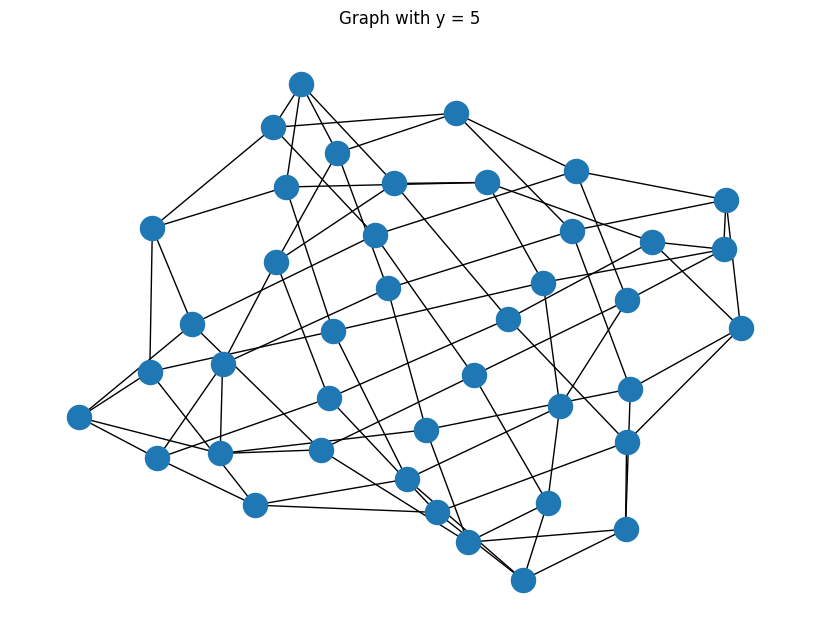

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx
from torch_geometric.data import Data

# Example: Visualize the first graph in the list
graph = train_set[5]  # Replace with your data object
G = to_networkx(graph,  to_undirected=True)

plt.figure(figsize=(8, 6))
nx.draw(G)
plt.title(f"Graph with y = {graph.y}")
plt.show()



In [ ]:
class FourCycles(SymmetrySet):
    def __init__(self):
        super().__init__()
        self.p = 4
        self.hidden_units = 16
        self.num_classes = 2
        self.num_features = 1
        self.num_nodes = 4 * self.p
        self.graph_class = True

    def gen_graph(self, p):
        edge_index = None
        for i in range(p):
            e = torch.tensor([[i, p + i, 2 * p + i, 3 * p + i], [2 * p + i, 3 * p + i, i, p + i]], dtype=torch.long)
            if edge_index is None:
                edge_index = e
            else:
                edge_index = torch.cat([edge_index, e], dim=-1)
        top = np.zeros((p * p,))
        perm = np.random.permutation(range(p))
        for i, t in enumerate(perm):
            top[i * p + t] = 1
        bottom = np.zeros((p * p,))
        perm = np.random.permutation(range(p))
        for i, t in enumerate(perm):
            bottom[i * p + t] = 1
        for i, bit in enumerate(top):
            if bit:
                e = torch.tensor([[i // p, p + i % p], [p + i % p, i // p]], dtype=torch.long)
                edge_index = torch.cat([edge_index, e], dim=-1)
        for i, bit in enumerate(bottom):
            if bit:
                e = torch.tensor([[2 * p + i // p, 3 * p + i % p], [3 * p + i % p, 2 * p + i // p]], dtype=torch.long)
                edge_index = torch.cat([edge_index, e], dim=-1)
        return Data(edge_index=edge_index, num_nodes=self.num_nodes), any(np.logical_and(top, bottom))

    def makedata(self):
        size = 25
        p = self.p
        trues = []
        falses = []
        while len(trues) < size or len(falses) < size:
            data, label = self.gen_graph(p)
            data = self.makefeatures(data)
            data = self.addports(data)
            data.y = int(label)
            if label and len(trues) < size:
                trues.append(data)
            elif not label and len(falses) < size:
                falses.append(data)
        return trues + falses

In [ ]:
fourcycles_dataset = FourCycles()
train_set = fourcycles_dataset.makedata()
train_set

[Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1], y=1),
 Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1], y=1),
 Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1], y=1),
 Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1], y=1),
 Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1], y=1),
 Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1], y=1),
 Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1], y=1),
 Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1], y=1),
 Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1], y=1),
 Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1], y=1),
 Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1], y=1),
 Data(edge_index=[2, 32], num_nodes=16, x=[16, 1], id=[16, 1], ports=[32, 1]

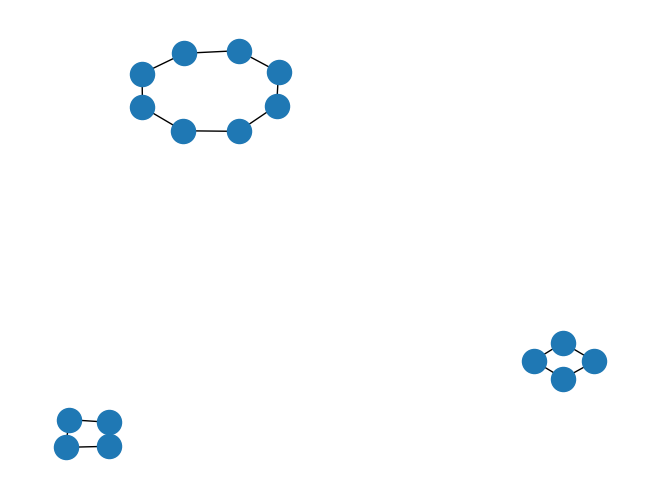

In [ ]:
graph = train_set[6]
G = to_networkx(graph,to_undirected=True)
nx.draw(G)
